# Week 2: Image Processing

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

dataDir = './data' # Change this, according to your images' directory path

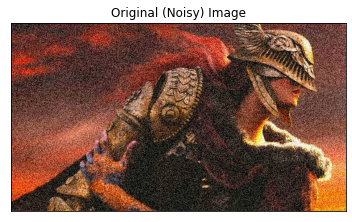

In [5]:
# Opening a noisy image
img = cv2.imread(os.path.join(dataDir, 'eldenring_noise.jpg')) # Change this, according to your image's path
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Original (Noisy) Image')
plt.xticks([]), plt.yticks([])
plt.show()

## Filtering and Smoothing

[Mean Filter (Option 1)](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga8c45db9afe636703801b0b2e440fce37)

[Mean Filter (Option 2)](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#gad533230ebf2d42509547d514f7d3fbc3)

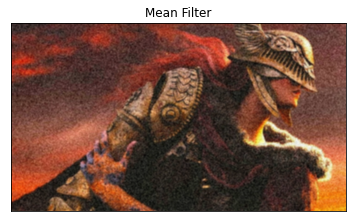

In [6]:
# Using a Mean Filter (Option 1)
imgWithMeanFilter = cv2.blur(img, (4,4))

plt.imshow(imgWithMeanFilter)
plt.title('Mean Filter')
plt.xticks([]), plt.yticks([])
plt.show()

[Median Filter](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga564869aa33e58769b4469101aac458f9)

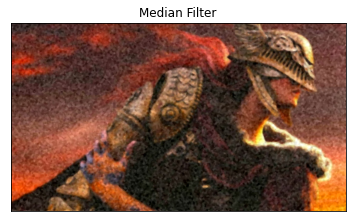

In [7]:
# Using a Median Filter
imgWithMedianFilter = cv2.medianBlur(img, 5)

plt.imshow(imgWithMedianFilter)
plt.title('Median Filter')
plt.xticks([]), plt.yticks([])
plt.show()

[Gaussian Filter](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1)

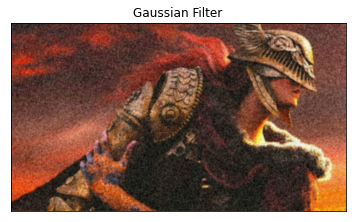

In [8]:
# Using a Gaussian Filter
imgWithGaussianFilter = cv2.GaussianBlur(img, (5,5), 0)

plt.imshow(imgWithGaussianFilter)
plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.show()

[Bilateral Filter](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga9d7064d478c95d60003cf839430737ed)

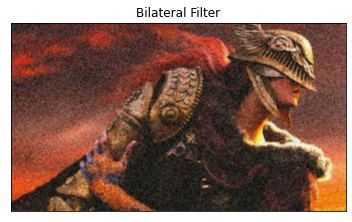

In [10]:
# Using a Bilateral Filter
imgWithBilateralFilter = cv2.bilateralFilter(img, 15, 75, 75)

plt.imshow(imgWithGaussianFilter)
plt.title('Bilateral Filter')
plt.xticks([]), plt.yticks([])
plt.show()

**Challenge**

1. Download an image (colour or grayscale) of your choosing;

2. Apply salt and pepper noise to it;

3. Try smoothing the image with some of the presentented techniques;

4. Explore filtering with convolutions --- see exercise 4.e) of the exercises sheet.

----------

You can consult [this page](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html) for guidance.

And feel free to share your results in the *General* channel

## Thresholding

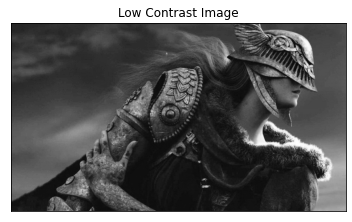

In [13]:
imgLC = cv2.imread(os.path.join(dataDir, 'elden_ring.jpg'), 0) # Change this, according to your image's path

plt.imshow(imgLC, cmap="gray")
plt.title('Low Contrast Image')
plt.xticks([]), plt.yticks([])
plt.show()

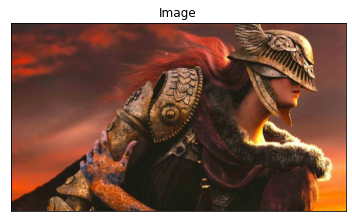

In [13]:
imgLC2 = cv2.imread(os.path.join(dataDir, 'elden_ring.jpg'))
imgLC2 = cv2.cvtColor(imgLC2, cv2.COLOR_BGR2RGB)

plt.imshow(imgLC2)
plt.title('Image')
plt.xticks([]), plt.yticks([])
plt.show()

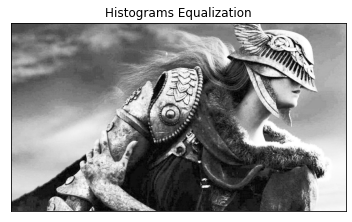

In [14]:
# Increasing Contrast with Histograms Equalization
imgLCwithHE = cv2.equalizeHist(imgLC)

plt.imshow(imgLCwithHE, cmap="gray")
plt.title('Histograms Equalization')
plt.xticks([]), plt.yticks([])
plt.show()

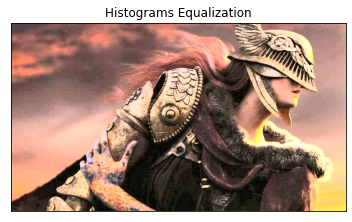

In [17]:
img_yuv = cv2.cvtColor(imgLC2, cv2.COLOR_RGB2YUV)

# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

# convert the YUV image back to RGB format
imgLC2withHE = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

plt.imshow(imgLC2withHE)
plt.title('Histograms Equalization')
plt.xticks([]), plt.yticks([])
plt.show()

[Contrast Limited Adaptive Histogram Equalization](https://docs.opencv.org/master/d6/dc7/group__imgproc__hist.html#gad689d2607b7b3889453804f414ab1018)

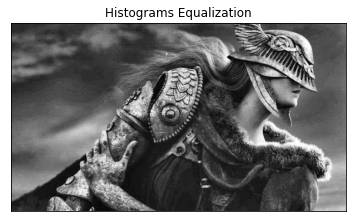

In [15]:
# Increasing Contrast with CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
imgLCwithCLAHE = clahe.apply(imgLC)

plt.imshow(imgLCwithCLAHE, cmap="gray")
plt.title('Histograms Equalization')
plt.xticks([]), plt.yticks([])
plt.show()

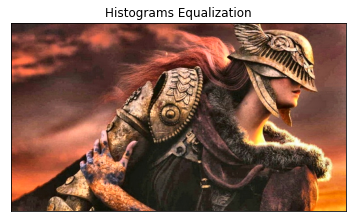

In [18]:
# Increasing Contrast with CLAHE
clahe2 = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

lab = cv2.cvtColor(imgLC2, cv2.COLOR_RGB2LAB)
lab_planes = cv2.split(lab)
lab_planes[0] = clahe2.apply(lab_planes[0])
lab = cv2.merge(lab_planes)

imgLC2withCLAHE = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)

plt.imshow(imgLC2withCLAHE)
plt.title('Histograms Equalization')
plt.xticks([]), plt.yticks([])
plt.show()

Challenge: Repeat the process for a coloured image